<a href="https://colab.research.google.com/github/mleyvaz/redes/blob/main/deteccion_de_nomalias_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 

In [4]:
redes = pd.read_csv('https://raw.githubusercontent.com/mleyvaz/redes/main/swich1.csv')
# summarize shape
print(redes.shape)
# show first few rows
print(redes.head())

(7823, 21)
                       Fecha Hora  ...  Available Memory 1 (Processor)(RAW)
0  03/02/2020 15:00:00 - 16:00:00  ...                          353950858.0
1  03/02/2020 16:00:00 - 17:00:00  ...                          353950717.9
2  03/02/2020 17:00:00 - 18:00:00  ...                          353952062.2
3  03/02/2020 18:00:00 - 19:00:00  ...                          353952334.8
4  03/02/2020 19:00:00 - 20:00:00  ...                          353952218.7

[5 rows x 21 columns]


In [5]:
redes.describe()

,Fecha Hora(RAW),Tiempo de Ping(RAW),Perdida de paquetes(RAW),Disponibilidad de sistema(RAW),Trafico suma (volumen)(RAW),Trafico suma (velocidad)(RAW),"Temperature 1006 (Switch 1 - Temp Sensor 0, GREEN )(RAW)","Temperature 1007 (Switch 1 - Temp Sensor 1, GREEN )(RAW)","Temperature 1008 (Switch 1 - Temp Sensor 2, GREEN )(RAW)",CPU 1000(RAW),Available Memory 1 (Processor)(RAW)
count,7823.000000,7823.000000,7823.000000,7.823000e+03,7.823000e+03,7.823000e+03,7823.000000,7823.000000,7823.000000,7823.000000,7.823000e+03
mean,44042.230048,2.486749,0.001790,6.201018e+06,9.098053e+06,2.554439e+03,31.087266,39.056048,42.784597,2.516267,3.565131e+08
std,103.834752,0.657623,0.019137,4.120809e+06,1.018340e+08,2.847465e+04,2.445257,2.006405,1.486265,0.541393,6.405974e+05
min,43864.875000,2.015000,0.000000,3.603000e+03,0.000000e+00,0.000000e+00,25.916700,33.000000,35.050000,1.016700,3.539263e+08
25%,43953.270835,2.171700,0.000000,3.050644e+06,0.000000e+00,0.000000e+00,29.266700,38.000000,42.000000,2.033300,3.561119e+08
50%,44034.750000,2.263300,0.000000,5.442290e+06,0.000000e+00,0.000000e+00,31.000000,39.000000,42.616700,2.333300,3.563253e+08
75%,44127.062500,2.430000,0.000000,8.767783e+06,0.000000e+00,0.000000e+00,32.216700,40.000000,43.633300,2.866700,3.565745e+08
max,44227.166670,8.141700,0.833300,1.557288e+07,7.697281e+09,2.138294e+06,40.983300,47.000000,49.033300,5.250000,3.593339e+08


In [6]:
pip install pycaret

     |████████████████████████████████| 81kB 4.3MB/s 
ERROR: pandas-profiling 2.10.0 has requirement requests>=2.24.0, but you'll have requests 2.23.0 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [7]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


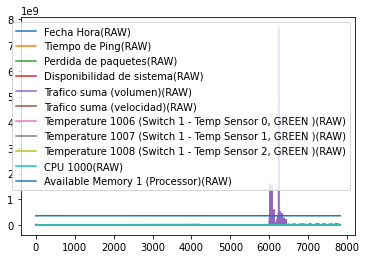

In [8]:
redes.plot()

In [9]:
data = redes.sample(frac=0.95, random_state=786)
data_unseen = redes.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (7432, 21)
Unseen Data For Predictions: (391, 21)


In [10]:
from pycaret.anomaly import *

exp_ano101 = setup(data, normalize = True, 
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(7432, 21)"
2,Missing Values,False
3,Numeric Features,11
4,Categorical Features,10
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(7432, 10184)"
9,CPU Jobs,-1


In [11]:

iforest = create_model('iforest')
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [ ]:
svm = create_model('svm', fraction = 0.025)
print(svm)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:52:38
Status,. . . . . . . . . . . . . . . . . .,Fitting 0.025 Fraction
Estimator,. . . . . . . . . . . . . . . . . .,One-class SVM detector


In [2]:
svm_results = assign_model(svm)
svm.head()

NameError: ignored

In [12]:
iforest_results = assign_model(iforest)
iforest_results.head()

,Fecha Hora,Fecha Hora(RAW),Tiempo de Ping,Tiempo de Ping(RAW),Perdida de paquetes(RAW),Disponibilidad de sistema,Disponibilidad de sistema(RAW),Trafico suma (volumen),Trafico suma (volumen)(RAW),Trafico suma (velocidad),Trafico suma (velocidad)(RAW),"Temperature 1006 (Switch 1 - Temp Sensor 0, GREEN )","Temperature 1006 (Switch 1 - Temp Sensor 0, GREEN )(RAW)","Temperature 1007 (Switch 1 - Temp Sensor 1, GREEN )","Temperature 1007 (Switch 1 - Temp Sensor 1, GREEN )(RAW)","Temperature 1008 (Switch 1 - Temp Sensor 2, GREEN )","Temperature 1008 (Switch 1 - Temp Sensor 2, GREEN )(RAW)",CPU 1000,CPU 1000(RAW),Available Memory 1 (Processor),Available Memory 1 (Processor)(RAW),Anomaly,Anomaly_Score
0,22/08/2020 12:00:00 - 13:00:00,44065.75000,2 mseg,2.1150,0.0,17 d,1547296.0,0,0.0,0,0.0,29 °C,29.1167,38 °C,37.8000,42 °C,41.9667,"2,43 %",2.4333,340 MByte,356558939.8,0,-0.012273
1,21/05/2020 3:00:00 - 4:00:00,43972.37500,5 mseg,4.6433,0.0,104 d,9053983.0,0,0.0,0,0.0,30 °C,30.0000,38 °C,38.0000,42 °C,42.0000,"2,23 %",2.2333,340 MByte,356087910.9,0,-0.005489
2,02/08/2020 18:00:00 - 19:00:00,44046.00000,2 mseg,2.3017,0.0,178 d,15415203.0,0,0.0,0,0.0,33 °C,32.9500,40 °C,40.1833,44 °C,44.0000,"2,52 %",2.5167,340 MByte,356152866.9,0,-0.020823
3,18/09/2020 1:00:00 - 2:00:00,44092.29167,2 mseg,2.1033,0.0,44 d,3840497.0,0,0.0,0,0.0,30 °C,30.0000,38 °C,38.4500,42 °C,42.4667,"2,33 %",2.3333,340 MByte,356466451.5,0,-0.012563
4,20/10/2020 20:00:00 - 21:00:00,44125.08333,2 mseg,2.0300,0.0,77 d,6673698.0,0,0.0,0,0.0,32 °C,31.9833,40 °C,39.6667,43 °C,43.0000,"2,10 %",2.1000,340 MByte,356258244.9,0,-0.016966


In [ ]:
plot_model(iforest)

In [13]:
iforest_results.sort_values('Anomaly', ascending=False)


,Fecha Hora,Fecha Hora(RAW),Tiempo de Ping,Tiempo de Ping(RAW),Perdida de paquetes(RAW),Disponibilidad de sistema,Disponibilidad de sistema(RAW),Trafico suma (volumen),Trafico suma (volumen)(RAW),Trafico suma (velocidad),Trafico suma (velocidad)(RAW),"Temperature 1006 (Switch 1 - Temp Sensor 0, GREEN )","Temperature 1006 (Switch 1 - Temp Sensor 0, GREEN )(RAW)","Temperature 1007 (Switch 1 - Temp Sensor 1, GREEN )","Temperature 1007 (Switch 1 - Temp Sensor 1, GREEN )(RAW)","Temperature 1008 (Switch 1 - Temp Sensor 2, GREEN )","Temperature 1008 (Switch 1 - Temp Sensor 2, GREEN )(RAW)",CPU 1000,CPU 1000(RAW),Available Memory 1 (Processor),Available Memory 1 (Processor)(RAW),Anomaly,Anomaly_Score
4285,10/11/2020 12:00:00 - 13:00:00,44145.75000,2 mseg,2.1133,0.0,15 h 2 m,5.412300e+04,232.092 KByte,2.376624e+08,528 kbit/s,66022.0956,30 °C,30.0833,39 °C,38.6333,43 °C,42.5333,"3,20 %",3.2000,342 MByte,358600757.9,1,0.007495
376,10/11/2020 15:00:00 - 16:00:00,44145.87500,2 mseg,2.2833,0.0,18 h 2 m,6.492332e+04,279.969 KByte,2.866878e+08,637 kbit/s,79641.4602,32 °C,32.2000,40 °C,40.0000,44 °C,43.5333,"3,28 %",3.2833,342 MByte,358586955.7,1,0.004435
3025,03/04/2020 20:00:00 - 21:00:00,43925.08333,3 mseg,2.6033,0.0,57 d,4.967996e+06,0,0.000000e+00,0,0.0000,36 °C,36.0000,43 °C,43.1000,46 °C,46.0500,"2,53 %",2.5333,340 MByte,356014955.1,1,0.000581
5804,07/04/2020 6:00:00 - 7:00:00,43928.50000,2 mseg,2.4467,0.0,60 d,5.263196e+06,0,0.000000e+00,0,0.0000,35 °C,35.2667,43 °C,42.9167,46 °C,45.9000,"2,15 %",2.1500,340 MByte,356042392.5,1,0.000229
370,03/12/2020 21:00:00 - 22:00:00,44169.12500,2 mseg,2.1283,0.0,18 d,1.593921e+06,9.529 KByte,9.757187e+06,22 kbit/s,2710.4576,31 °C,31.1000,39 °C,39.3333,43 °C,43.0000,"2,95 %",2.9500,341 MByte,357144939.9,1,0.002132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,28/09/2020 5:00:00 - 6:00:00,44102.45833,2 mseg,2.0933,0.0,54 d,4.718897e+06,0,0.000000e+00,0,0.0000,30 °C,30.0000,38 °C,38.0000,42 °C,42.0000,2%,2.0000,340 MByte,356391015.8,0,-0.021595
2533,12/03/2020 8:00:00 - 9:00:00,43902.58333,2 mseg,2.2117,0.0,34 d,3.023996e+06,0,0.000000e+00,0,0.0000,29 °C,29.0667,38 °C,37.9333,42 °C,41.9333,2%,2.0000,341 MByte,357149853.6,0,-0.004116
2532,14/10/2020 1:00:00 - 2:00:00,44118.29167,2 mseg,2.4367,0.0,70 d,6.086897e+06,0,0.000000e+00,0,0.0000,32 °C,32.0000,40 °C,40.0000,43 °C,43.0833,"3,12 %",3.1167,340 MByte,356243299.4,0,-0.014374
2531,06/03/2020 12:00:00 - 13:00:00,43896.75000,2 mseg,2.4233,0.0,29 d,2.519996e+06,0,0.000000e+00,0,0.0000,29 °C,29.0167,37 °C,37.3167,41 °C,41.4667,"3,35 %",3.3500,340 MByte,356986359.4,0,-0.001808


In [16]:
# load the car sales dataset
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from fbprophet import Prophet
from pandas import to_datetime

,Fecha Hora(RAW),Tiempo de Ping(RAW),Perdida de paquetes(RAW),Disponibilidad de sistema(RAW),Trafico suma (volumen)(RAW),Trafico suma (velocidad)(RAW),"Temperature 1006 (Switch 1 - Temp Sensor 0, GREEN )(RAW)","Temperature 1007 (Switch 1 - Temp Sensor 1, GREEN )(RAW)","Temperature 1008 (Switch 1 - Temp Sensor 2, GREEN )(RAW)",CPU 1000(RAW),Available Memory 1 (Processor)(RAW),Anomaly,Anomaly_Score
Fecha Hora(RAW),1.000000,-0.070410,-0.075719,-0.137522,0.098231,0.098495,0.041873,0.073981,0.063045,0.457781,0.060307,0.069871,0.130353
Tiempo de Ping(RAW),-0.070410,1.000000,0.110712,0.022764,0.013910,0.013702,0.000947,0.004025,0.008496,0.107159,0.030495,0.023984,0.076466
Perdida de paquetes(RAW),-0.075719,0.110712,1.000000,0.013596,0.032121,0.061184,-0.010138,-0.010902,-0.008682,-0.027818,0.010707,-0.021232,-0.007527
Disponibilidad de sistema(RAW),-0.137522,0.022764,0.013596,1.000000,-0.050445,-0.050194,-0.349162,-0.346757,-0.340640,-0.286329,-0.665788,-0.054786,-0.226872
Trafico suma (volumen)(RAW),0.098231,0.013910,0.032121,-0.050445,1.000000,0.998211,0.027551,0.033107,0.036356,0.105028,0.055685,0.145277,0.147020
Trafico suma (velocidad)(RAW),0.098495,0.013702,0.061184,-0.050194,0.998211,1.000000,0.026805,0.032585,0.035788,0.105493,0.056093,0.144295,0.147242
"Temperature 1006 (Switch 1 - Temp Sensor 0, GREEN )(RAW)",0.041873,0.000947,-0.010138,-0.349162,0.027551,0.026805,1.000000,0.985975,0.963763,0.149134,-0.000595,0.130586,0.224006
"Temperature 1007 (Switch 1 - Temp Sensor 1, GREEN )(RAW)",0.073981,0.004025,-0.010902,-0.346757,0.033107,0.032585,0.985975,1.000000,0.980480,0.164645,0.000785,0.132988,0.235624
"Temperature 1008 (Switch 1 - Temp Sensor 2, GREEN )(RAW)",0.063045,0.008496,-0.008682,-0.340640,0.036356,0.035788,0.963763,0.980480,1.000000,0.155109,0.001181,0.144346,0.243996
CPU 1000(RAW),0.457781,0.107159,-0.027818,-0.286329,0.105028,0.105493,0.149134,0.164645,0.155109,1.000000,0.227009,0.074807,0.229959


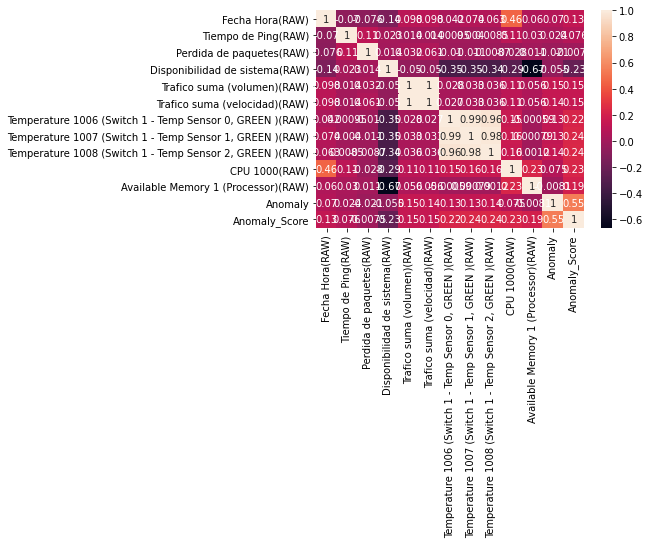

In [49]:
corrMatrix = iforest_results.corr()
sns.heatmap(corrMatrix, annot=True)
corrMatrix

0.0
H1  La muestra no sigue una distribución normal
stat=-57.673, p=0.000
Probably Stationary


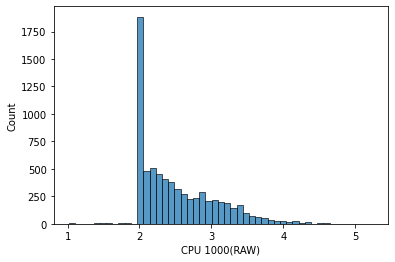

In [62]:
#@title Texto de título predeterminado { run: "auto", vertical-output: true }
fila = "CPU 1000(RAW)" #@param ["CPU 1000(RAW)", "Tiempo de Ping(RAW)"]
anomalia = "0" #@param ["1", "0"]
a = iforest_results.loc[(iforest_results.Anomaly==int(anomalia))] 
sns.histplot(a[fila])
stat, p = stats.shapiro(a[fila])
# interpret
print(p)
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal')
else:
	print('H1  La muestra no sigue una distribución normal')
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
stat, p, lags, obs, crit, t = adfuller(a[fila])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')


In [ ]:
unseen_predictions = predict_model(iforest, data=data_unseen)
unseen_predictions.head()



,Fecha Hora,Fecha Hora(RAW),Tiempo de Ping,Tiempo de Ping(RAW),Perdida de paquetes(RAW),Disponibilidad de sistema,Disponibilidad de sistema(RAW),Trafico suma (volumen),Trafico suma (volumen)(RAW),Trafico suma (velocidad),Trafico suma (velocidad)(RAW),"Temperature 1006 (Switch 1 - Temp Sensor 0, GREEN )","Temperature 1006 (Switch 1 - Temp Sensor 0, GREEN )(RAW)","Temperature 1007 (Switch 1 - Temp Sensor 1, GREEN )","Temperature 1007 (Switch 1 - Temp Sensor 1, GREEN )(RAW)","Temperature 1008 (Switch 1 - Temp Sensor 2, GREEN )","Temperature 1008 (Switch 1 - Temp Sensor 2, GREEN )(RAW)",CPU 1000,CPU 1000(RAW),Available Memory 1 (Processor),Available Memory 1 (Processor)(RAW),Anomaly,Anomaly_Score
0,03/02/2020 20:00:00 - 21:00:00,43865.08333,2 mseg,2.2317,0.0,149 d,12912307.0,0,0.0,0,0.0,33 °C,33.05,40 °C,40.45,44 °C,43.8333,"1,48 %",1.4833,338 MByte,353952124.9,0,-0.007372
1,04/02/2020 2:00:00 - 3:00:00,43865.33333,2 mseg,2.3217,0.0,149 d,12933907.0,0,0.0,0,0.0,32 °C,32.00,40 °C,40.00,43 °C,43.1833,"1,48 %",1.4833,338 MByte,353939462.8,0,-0.005618
2,04/02/2020 4:00:00 - 5:00:00,43865.41667,2 mseg,2.3683,0.0,149 d,12941107.0,0,0.0,0,0.0,32 °C,31.95,39 °C,39.00,43 °C,43.0000,"1,50 %",1.5000,338 MByte,353937923.3,0,-0.003594
3,04/02/2020 9:00:00 - 10:00:00,43865.62500,2 mseg,2.1650,0.0,149 d,12959107.0,0,0.0,0,0.0,30 °C,30.00,38 °C,38.00,42 °C,42.0500,"1,68 %",1.6833,338 MByte,353942713.0,0,-0.008081
4,06/02/2020 0:00:00 - 1:00:00,43867.25000,2 mseg,2.1583,0.0,151 d,13099507.0,0,0.0,0,0.0,32 °C,32.00,39 °C,39.00,43 °C,43.0000,"1,25 %",1.2500,338 MByte,353958657.1,0,-0.001690
